In [980]:
import numpy as np
import pandas as pd


train = pd.read_csv('train_data_final.csv')
test = pd.read_csv('test_data_final.csv')
sample_submission = pd.read_csv('andan-2023-autumn-lab-4/sample_submission.csv')
train.drop(['user1', 'user2'], axis=1, inplace=True)
test.drop(['user1', 'user2'], axis=1, inplace=True)


# train.drop('Unnamed: 0', axis=1, inplace=True)
train

,is_friends,same_city,same_school,same_uni,same_career,same_faculties,same_uni_grad_year,mutual_friends,followers_count_user1,followers_count_user2,...,user1_likes,user2_likes,user1_avg_views,user2_avg_views,user1_avg_comments,user2_avg_comments,percentage_of_mutual_friends,mut_f_of_f,same_uni_and_mut_f,same_city_and_mut_f
0,0,1,0,1,0,1,0,3,704,444,...,652,610,657.150000,555.50,1.000000,3.15,0.003778,5635,1,1
1,0,0,0,0,0,0,0,0,1017,85,...,139,405,184.700000,353.60,0.250000,2.65,0.000000,1,0,0
2,0,1,0,1,0,0,0,1,465,409,...,100,12,165.750000,114.25,0.200000,0.05,0.001300,1255,0,0
3,0,0,0,1,0,0,0,0,111,611,...,7,142,378.000000,282.90,0.000000,0.95,0.000000,249,0,0
4,0,0,0,1,0,0,0,0,190,157,...,123,0,163.400000,0.00,1.000000,0.00,0.000000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39787,1,1,0,0,0,0,0,36,269,1532,...,41,630,246.450000,938.10,0.000000,2.45,0.021765,3808,0,1
39788,1,0,0,0,0,0,0,5,484,26,...,226,2,1871.000000,70.00,18.000000,0.00,0.012887,499,0,0
39789,1,1,0,1,0,0,0,47,287,662,...,307,959,573.571429,1400.75,1.571429,2.30,0.051592,7530,1,1
39790,1,0,0,0,0,0,0,3,422,433,...,8,43,281.333333,1039.50,0.000000,5.00,0.007481,19,0,0


In [0]:
from matplotlib import pyplot as plt
import seaborn as sns


def heatmap(data: pd.DataFrame):
    plt.figure(figsize=(20, 20))
    sns.heatmap(data.corr(method='kendall'), square=True, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.show()

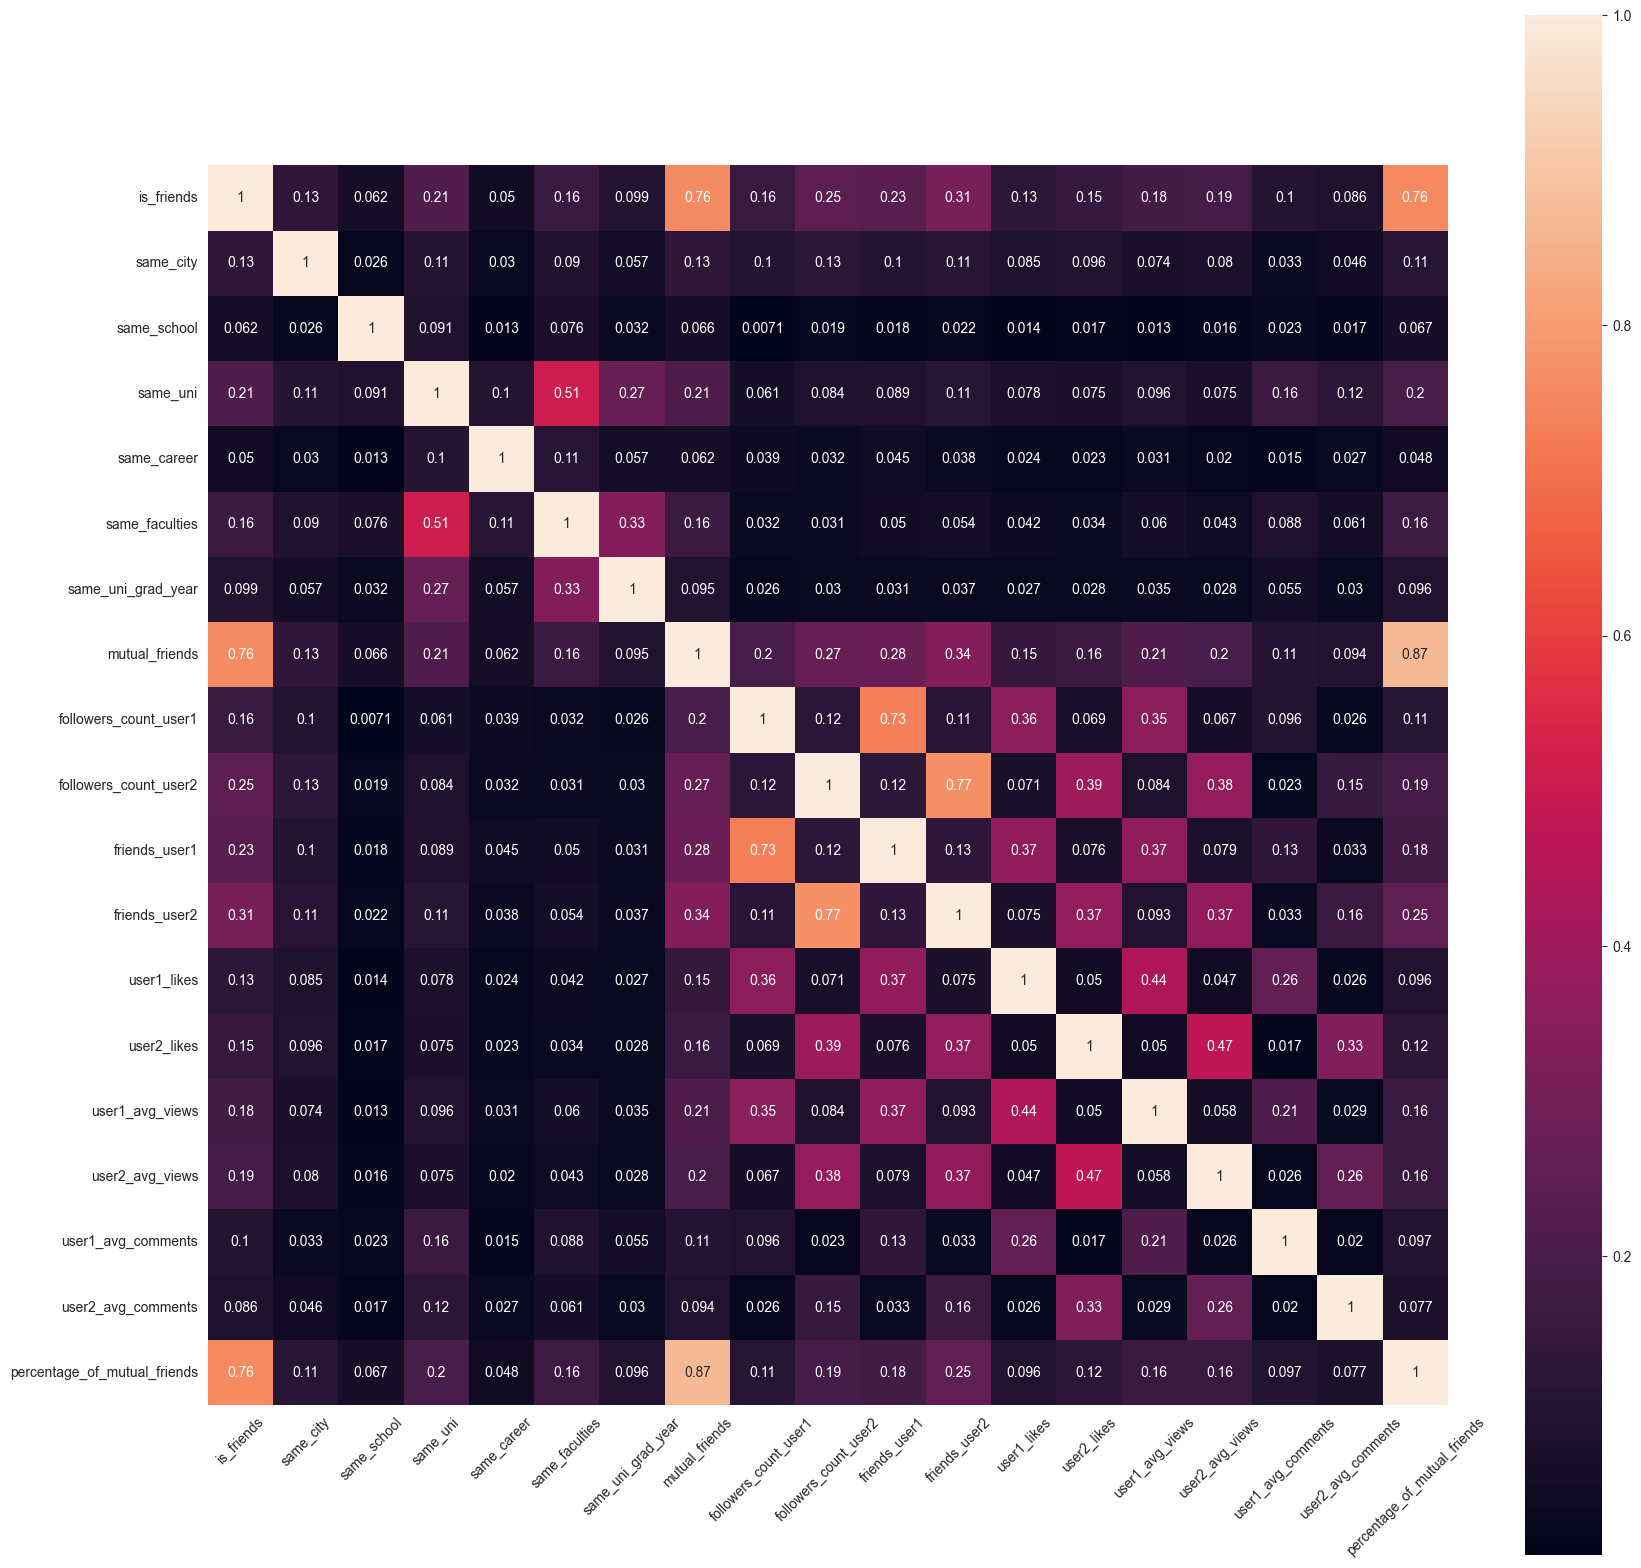

In [858]:
heatmap(train)


In [937]:
train.drop(['mut_f_of_f', 'same_uni_and_mut_f', 'same_city_and_mut_f'], axis=1, inplace=True)
test.drop(['mut_f_of_f', 'same_uni_and_mut_f', 'same_city_and_mut_f'], axis=1, inplace=True)

In [824]:
test

,mutual_friends,friends_user1,friends_user2,percentage_of_mutual_friends,mut_f_of_f,same_uni_and_mut_f,same_city_and_mut_f
0,0,247,166,0.000000,117,0,0
1,0,194,300,0.000000,414,1,0
2,0,208,123,0.000000,35,0,0
3,0,102,121,0.000000,12,0,1
4,10,300,259,0.017889,1081,0,0
...,...,...,...,...,...,...,...
706402,0,1185,282,0.000000,157,0,0
706403,0,107,106,0.000000,8,0,1
706404,0,449,16,0.000000,14,0,1
706405,0,181,30,0.000000,38,0,0


In [906]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier

X = train.drop(['is_friends'], axis=1)
y = train['is_friends']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)

# dec_model = DecisionTreeClassifier(random_state=42)
# dec_model.fit(X_train_1, y_train_1)
# y_pred_1 = dec_model.predict(X_test_1)

# logistic_model = LogisticRegression()
# logistic_model.fit(X_train_1, y_train_1)
# y_pred_1 = logistic_model.predict(X_test_1)

rand_forest_model = RandomForestClassifier()
rand_forest_model.fit(X_train_1, y_train_1)
y_pred_1 = rand_forest_model.predict(X_test_1)


from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

print('balanced_accuracy', balanced_accuracy_score(y_test_1, y_pred_1))
print('accuracy', accuracy_score(y_test_1, y_pred_1))
print('precision', precision_score(y_test_1, y_pred_1))
print('recall', recall_score(y_test_1, y_pred_1))
print('f1', f1_score(y_test_1, y_pred_1))


balanced_accuracy 0.9446219717605361
accuracy 0.9445910290237467
precision 0.9480649188514357
recall 0.9421836228287841
f1 0.9451151213441195


In [973]:

X_train = train.drop(['is_friends'], axis=1)
y_train = train['is_friends']

In [974]:
rand_forest_model = RandomForestClassifier()
rand_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [975]:
# X_test = test.drop(['ID', 'user1', 'user2'], axis=1)
y_pred = rand_forest_model.predict(test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [976]:
sample_submission['is_friends'] = y_pred

In [977]:
# for i in range(len(y_pred)):
#     sample_submission['is_friends'][i] = y_pred[i]
# sample_submission
sample_submission.is_friends.value_counts()

is_friends
0    667109
1     39298
Name: count, dtype: int64

In [978]:
sample_submission.to_csv('sample_submission.csv', index=False)

In [960]:
def get_balanced_ac_of_two_ds(ds1, ds2):
    y_true = ds1['is_friends']
    y_pred = ds2['is_friends']
    return balanced_accuracy_score(y_true, y_pred)

In [979]:
df_benchmark = pd.read_csv('sample_submission21_kaggle.csv')
df_test = pd.read_csv('sample_submission.csv')

print(get_balanced_ac_of_two_ds(df_benchmark, df_test))

0.8991260143950655
0.958303160481401
0.8986431322810675


In [800]:
df_benchmark.is_friends.value_counts()

In [962]:
df_test.is_friends.value_counts()

is_friends
0    666727
1     39680
Name: count, dtype: int64

In [607]:
# def get_best_score_sb(X, y, test, y_true):
#     best_score = 0
#     best_seed = 0
#     best_prediction = None
#     for seed in tqdm(range(100)):
#         rand_forest_model = RandomForestClassifier(random_state=seed)
#         rand_forest_model.fit(X, y)
#         y_pred = rand_forest_model.predict(test)
#         score = balanced_accuracy_score(y_true, y_pred)
#         if score > best_score:
#             best_score = score
#             best_seed = seed
#             best_prediction = y_pred
#     return best_score, best_seed, best_prediction
#

In [184]:
# best_score, best_seed, best_prediction = get_best_score_sb(X_train, y_train, test, y_pred)